# Classification of Message as Spam and Ham

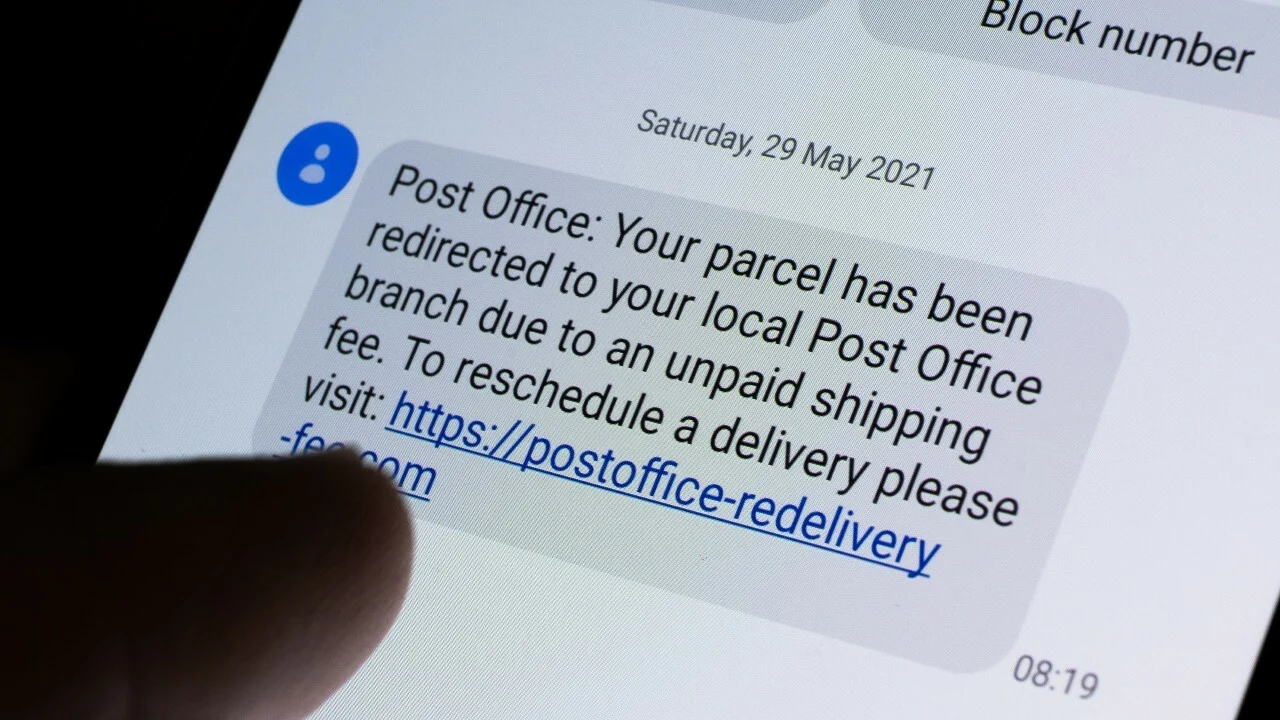
**Pic Credit:** PCMag

**Content Credit:** Udemy

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Reading SMS file
sms = pd.read_csv('smsspamcollection.tsv',sep = '\t')

sms.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
#Data Type Of Colummns
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [4]:
#Checking For Null Values
sms.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
#Shape of the file
sms.shape

(5572, 4)

In [6]:
sms.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
#Check for duplicate Values
sms[sms.duplicated()]

,label,message,length,punct
103,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
154,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
207,ham,"As I entered my cabin my PA said, '' Happy B'd...",156,13
223,ham,"Sorry, I'll call later",22,2
326,ham,No calls..messages..missed calls,32,4
...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,152,9
5535,ham,"I know you are thinkin malaria. But relax, chi...",329,6
5539,ham,Just sleeping..and surfing,26,2
5553,ham,Hahaha..use your brain dear,27,2


In [8]:
#Drop the Duplicate Values
sms.drop_duplicates(keep='last',inplace=True)

In [9]:
sms[sms.duplicated()]

,label,message,length,punct


In [10]:
#Final Shape of the Dataframe
sms.shape

(5169, 4)

In [11]:
#Counts of Labelled Messages
sms['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

4516 out of 5169 messages, or 87.36%, are ham. This means that any text classification model we create has to perform better than 87.36% to beat random chance.

### Split the data into Train and Test Split

In [12]:
from sklearn.model_selection import train_test_split

X = sms['message']
y = sms['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 133)

### Scikit-learn's CountVectorizer
Text preprocessing, tokenizing and the ability to filter out stopwords are all included in [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), which builds a dictionary of features and transforms documents to feature vectors.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

X_train_counts

<3463x6870 sparse matrix of type '<class 'numpy.int64'>'
	with 45591 stored elements in Compressed Sparse Row format>

In [14]:
X_train_counts.shape

(3463, 6870)

<font color = 'red'>This shows that our training set is comprised of 3463 documents, and 6870 features</font>

### Transform Counts to Frequencies with Tf-idf
While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid this we can simply divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called **tf** for Term Frequencies.

Another refinement on top of **tf** is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called **tf–idf** for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html):

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

X_train_tfidf = tfidf.fit_transform(X_train_counts)
X_train_tfidf.shape

(3463, 6870)

## Combine Steps with TfidVectorizer
In the future, we can combine the CountVectorizer and TfidTransformer steps into one using [TfidVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html):

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

X_train_tfidf_vect = tfidf_vect.fit_transform(X_train)
X_train_tfidf_vect.shape

(3463, 6870)

### Train a Classifier

In [17]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

model = clf.fit(X_train_tfidf_vect,y_train)

### Build a PipeLine

In [18]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf',TfidfVectorizer()),('Model',LinearSVC())])

model1 = text_clf.fit(X_train,y_train)

### Predict from Test Set

In [19]:
predictions = model1.predict(X_test)

from sklearn import metrics

print(metrics.confusion_matrix(y_test,predictions))

[[1495    2]
 [  12  197]]


In [20]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1497
        spam       0.99      0.94      0.97       209

    accuracy                           0.99      1706
   macro avg       0.99      0.97      0.98      1706
weighted avg       0.99      0.99      0.99      1706



In [21]:
print(metrics.accuracy_score(y_test,predictions))

0.9917936694021102


In [27]:
model1.predict(['Congratulations!!! You have won $50000000.'])

array(['spam'], dtype=object)